# Pandas

Pandas is used for data manipulation, analysis and cleaning. Python pandas is well suited for different kinds of data, such as: 

        Tabular data with heterogeneously-typed columns
        Ordered and unordered time series data
        Arbitrary matrix data with row & column labels
        Unlabelled data
        Any other form of observational or statistical data sets

#### Some of the common operations for data manipulation
![Operations-0-1.png](attachment:Operations-0-1.png "Operations")
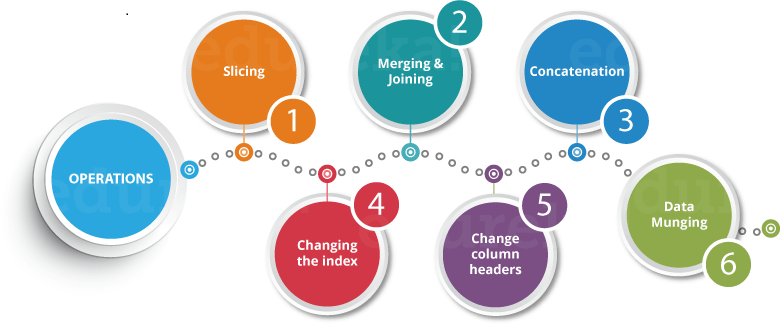

In [3]:
import pandas as pd 
data={'Name':['adam','bob','alice'], 'Location':['Tacoma','yakima','lakewood'], 'Amt_paid':[100,150,50]}
df= pd.DataFrame(data)
print(df)

    Name  Location  Amt_paid
0   adam    Tacoma       100
1    bob    yakima       150
2  alice  lakewood        50


#### Slicing the Data Frame

In [4]:
print(df.head(2))

   Name Location  Amt_paid
0  adam   Tacoma       100
1   bob   yakima       150


In [5]:
print(df.tail(2))

    Name  Location  Amt_paid
1    bob    yakima       150
2  alice  lakewood        50


#### Merging & Joining

In [6]:
d1=pd.DataFrame({'Name':['adam','bob','alice'], 'Location':['Tacoma','yakima','lakewood'], 'Amt_paid':[100,150,50]},index=[1,2,3])
d2=pd.DataFrame({'Name':['adam','bob','khan'], 'Location':['Tacoma','yakima','puyallup'], 'Amt_paid':[100,150,150]},index=[4,5,6])
m_data=pd.merge(d1,d2)
print(m_data)

   Name Location  Amt_paid
0  adam   Tacoma       100
1   bob   yakima       150


In [7]:
m_data=pd.merge(d1,d2,on='Name') #Name column will be common for both the data frames
print(m_data)

   Name Location_x  Amt_paid_x Location_y  Amt_paid_y
0  adam     Tacoma         100     Tacoma         100
1   bob     yakima         150     yakima         150


In [8]:
#Joining
d1=pd.DataFrame({'Name':['adam','bob','alice'], 'Location':['Tacoma','yakima','lakewood'], 'Amt_paid':[100,150,50]},index=[1,2,3])
d2=pd.DataFrame({'Date':['23-Jan-2010','22-Jan-2010','27-Jan-2010']},index=[1,2,4])
j_data=d1.join(d2)
print(j_data)

    Name  Location  Amt_paid         Date
1   adam    Tacoma       100  23-Jan-2010
2    bob    yakima       150  22-Jan-2010
3  alice  lakewood        50          NaN


#### Concatenation

In [9]:
d1=pd.DataFrame({'Name':['adam','bob','alice'], 'Location':['Tacoma','yakima','lakewood'], 'Amt_paid':[100,150,50],'Date':['23-Jan-2010','22-Jan-2010','27-Jan-2010']},index=[1,2,3])
d2=pd.DataFrame({'Name':['adam','bob','khan'], 'Location':['Tacoma','yakima','puyallup'], 'Amt_paid':[100,150,150],'Date':['24-Jan-2011','23-Jan-2011','26-Jan-2011']},index=[4,5,6])
c_data=pd.concat([d1,d2])
print(c_data)

    Name  Location  Amt_paid         Date
1   adam    Tacoma       100  23-Jan-2010
2    bob    yakima       150  22-Jan-2010
3  alice  lakewood        50  27-Jan-2010
4   adam    Tacoma       100  24-Jan-2011
5    bob    yakima       150  23-Jan-2011
6   khan  puyallup       150  26-Jan-2011


#### Changing the index

In [10]:
d1=pd.DataFrame({'Day':[1,2,3,4],'Calories_Burnt':[2000,2200,2400,2500]})
d1.set_index("Day", inplace= True)
print(d1)

     Calories_Burnt
Day                
1              2000
2              2200
3              2400
4              2500


#### Changing the column header

In [11]:
d1=d1.rename(columns={'Calories_Burnt':'Calories_Burnt_cycling'})
print(d1)

     Calories_Burnt_cycling
Day                        
1                      2000
2                      2200
3                      2400
4                      2500


#### Data Munging (Data wrangling)
It is the initial process of refining raw data into content or formats better-suited for consumption by downstream systems and users

In [101]:
import pandas as pd
Sample_data= pd.read_csv("D:Sample_data.csv",index_col=0)
Sample_data.to_html('Sample_data.html')

In [94]:
#Creating
import numpy as np
data=np.arange(1,21).reshape(5,4)
df = pd.DataFrame(data,index='A B C D E'.split(),columns='W X Y Z'.split())
print(df)

    W   X   Y   Z
A   1   2   3   4
B   5   6   7   8
C   9  10  11  12
D  13  14  15  16
E  17  18  19  20


#### Some Operations

In [91]:
print(df['W'] )
print(df[['X','Y']]) # To fetch list of columns

A     1
B     5
C     9
D    13
E    17
Name: W, dtype: int32
    X   Y
A   2   3
B   6   7
C  10  11
D  14  15
E  18  19


In [92]:
df['new'] = df['W'] + df['Y']
print(df)

    W   X   Y   Z  new
A   1   2   3   4    4
B   5   6   7   8   12
C   9  10  11  12   20
D  13  14  15  16   28
E  17  18  19  20   36


In [93]:
#Selecting Rows
df.loc['A']

W      1
X      2
Y      3
Z      4
new    4
Name: A, dtype: int32

In [45]:
df.drop('new',axis=1,inplace=True)
df

,W,X,Y,Z
A,1,2,3,4
B,5,6,7,8
C,9,10,11,12
D,13,14,15,16
E,17,18,19,20


In [26]:
df.iloc[2] # fetching rows using index

W     9
X    10
Y    11
Z    12
Name: C, dtype: int32

In [27]:
#Selecting subset of rows and columns
df.loc['B','Y']

7

In [28]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,1,3
B,5,7


In [29]:
#Conditional Selection
df>5

,W,X,Y,Z
A,False,False,False,False
B,False,True,True,True
C,True,True,True,True
D,True,True,True,True
E,True,True,True,True


In [30]:
df[df>5] #prints the values

,W,X,Y,Z
A,NaN,NaN,NaN,NaN
B,NaN,6.0,7.0,8.0
C,9.0,10.0,11.0,12.0
D,13.0,14.0,15.0,16.0
E,17.0,18.0,19.0,20.0


In [47]:
df[df['W']>5][['Y','X']]

,Y,X
C,11,10
D,15,14
E,19,18


In [48]:
df[(df['W']>5) & (df['Y'] > 3)]

,W,X,Y,Z
C,9,10,11,12
D,13,14,15,16
E,17,18,19,20


In [95]:
#resetting index
df.reset_index()
df

,W,X,Y,Z
A,1,2,3,4
B,5,6,7,8
C,9,10,11,12
D,13,14,15,16
E,17,18,19,20


In [97]:
new_col='21 22 23 24 25'.split()
df['V']=new_col
df

,W,X,Y,Z,V
A,1,2,3,4,21
B,5,6,7,8,22
C,9,10,11,12,23
D,13,14,15,16,24
E,17,18,19,20,25


In [63]:
df.set_index('V',inplace=True)
df

,W,X,Y,Z
V,,,,
21,1,2,3,4
22,5,6,7,8
23,9,10,11,12
24,13,14,15,16
25,17,18,19,20


In [73]:
# Multi-index
multi_index = list(zip(['G1','G1','G2','G2'],[1,2,1,2]))
multi_index=pd.MultiIndex.from_tuples(multi_index)
multi_index

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G2', 1),
            ('G2', 2)],
           )

In [99]:
df = pd.DataFrame(np.random.randn(4,2),index=multi_index,columns=['A','B'])
df

A         B
Group Num                    
G1    1   -0.766366  0.022903
      2    1.325156 -0.818448
G2    1   -0.325619  1.608998
      2   -2.382092 -0.695184

In [75]:
df.loc['G1']

,A,B
1,0.493128,0.640814
2,-0.157017,0.409905


In [76]:
df.loc['G2'].loc[1]

A    2.212196
B    1.210274
Name: 1, dtype: float64

In [79]:
df.index.names = ['Group','Num']# Names for the index
df

A         B
Group Num                    
G1    1    0.493128  0.640814
      2   -0.157017  0.409905
G2    1    2.212196  1.210274
      2   -0.127130  0.600165

In [80]:
df.xs('G1')

,A,B
Num,,
1,0.493128,0.640814
2,-0.157017,0.409905


In [100]:
df.xs(2,level='Num')

,A,B
Group,,
G1,1.325156,-0.818448
G2,-2.382092,-0.695184


In [171]:
df=pd.read_csv('P1-OfficeSupplies.csv')

In [112]:
df

,OrderDate,Region,Rep,Item,Units,Unit Price
0,4-Jul-2014,East,Richard,Pen Set,62,4.99
1,12-Jul-2014,East,Nick,Binder,29,1.99
2,21-Jul-2014,Central,Morgan,Pen Set,55,12.49
3,29-Jul-2014,East,Susan,Binder,81,19.99
4,7-Aug-2014,Central,Matthew,Pen Set,42,23.95
5,15-Aug-2014,East,Richard,Pencil,35,4.99
6,24-Aug-2014,West,James,Desk,3,275.00
7,1-Sep-2014,Central,Smith,Desk,2,125.00
8,10-Sep-2014,Central,Bill,Pencil,7,1.29
9,18-Sep-2014,East,Richard,Pen Set,16,15.99


In [120]:
df[df['Region']=='East']

,OrderDate,Region,Rep,Item,Units,Unit Price
0,4-Jul-2014,East,Richard,Pen Set,62,4.99
1,12-Jul-2014,East,Nick,Binder,29,1.99
3,29-Jul-2014,East,Susan,Binder,81,19.99
5,15-Aug-2014,East,Richard,Pencil,35,4.99
9,18-Sep-2014,East,Richard,Pen Set,16,15.99
13,22-Oct-2014,East,Richard,Pen,64,8.99
15,8-Nov-2014,East,Susan,Pen,15,19.99
21,29-Dec-2014,East,Susan,Pen Set,74,15.99
22,6-Jan-2015,East,Richard,Pencil,95,1.99
27,18-Feb-2015,East,Richard,Binder,4,4.99


In [174]:
df['Total_price']= df['Units']*df['Unit Price']
df

,OrderDate,Region,Rep,Item,Units,Unit Price,Total_price
0,4-Jul-2014,East,Richard,Pen Set,62,4.99,309.38
1,12-Jul-2014,East,Nick,Binder,29,1.99,57.71
2,21-Jul-2014,Central,Morgan,Pen Set,55,12.49,686.95
3,29-Jul-2014,East,Susan,Binder,81,19.99,1619.19
4,7-Aug-2014,Central,Matthew,Pen Set,42,23.95,1005.90
5,15-Aug-2014,East,Richard,Pencil,35,4.99,174.65
6,24-Aug-2014,West,James,Desk,3,275.00,825.00
7,1-Sep-2014,Central,Smith,Desk,2,125.00,250.00
8,10-Sep-2014,Central,Bill,Pencil,7,1.29,9.03
9,18-Sep-2014,East,Richard,Pen Set,16,15.99,255.84


In [141]:
type(df['Unit Price'])

pandas.core.series.Series

In [142]:
type(df)

pandas.core.frame.DataFrame

In [143]:
type(df['Unit Price'].values)

numpy.ndarray

In [149]:
df['Units'].values

array([62, 29, 55, 81, 42, 35,  3,  2,  7, 16, 76, 28, 57, 64, 14, 15, 11,
       96, 94, 67, 28, 74, 95, 46, 50, 87, 36,  4, 27,  7, 56, 50, 60, 66,
       75, 96, 90, 53, 32, 80, 60,  5, 90], dtype=int64)

In [156]:
len(df['OrderDate'])

43

In [159]:
df.shape

(43, 7)

In [168]:
df.size

301

In [178]:
Amt_spent_Richard=df[df['Rep']=='Richard']
Amt_spent_Richard

,OrderDate,Region,Rep,Item,Units,Unit Price,Total_price
0,4-Jul-2014,East,Richard,Pen Set,62,4.99,309.38
5,15-Aug-2014,East,Richard,Pencil,35,4.99,174.65
9,18-Sep-2014,East,Richard,Pen Set,16,15.99,255.84
13,22-Oct-2014,East,Richard,Pen,64,8.99,575.36
22,6-Jan-2015,East,Richard,Pencil,95,1.99,189.05
27,18-Feb-2015,East,Richard,Binder,4,4.99,19.96
32,1-Apr-2015,East,Richard,Binder,60,4.99,299.40
40,8-Jun-2015,East,Richard,Binder,60,8.99,539.40


In [180]:
Amt_spent_Richard['Total_price'].sum()

2363.04

In [213]:
Rep_Names=df['Rep'].values
Name_starting_with_R={word for word in Rep_Names if word.startswith(('A','R'))}
Name_starting_with_R = list(Name_starting_with_R)
Name_starting_with_R

['Richard', 'Rachel', 'Alex']

In [260]:
date=list(df['OrderDate'])
date

['4-Jul-2014',
 '12-Jul-2014',
 '21-Jul-2014',
 '29-Jul-2014',
 '7-Aug-2014',
 '15-Aug-2014',
 '24-Aug-2014',
 '1-Sep-2014',
 '10-Sep-2014',
 '18-Sep-2014',
 '27-Sep-2014',
 '5-Oct-2014',
 '14-Oct-2014',
 '22-Oct-2014',
 '31-Oct-2014',
 '8-Nov-2014',
 '17-Nov-2014',
 '25-Nov-2014',
 '4-Dec-2014',
 '12-Dec-2014',
 '21-Dec-2014',
 '29-Dec-2014',
 '6-Jan-2015',
 '15-Jan-2015',
 '23-Jan-2015',
 '1-Feb-2015',
 '9-Feb-2015',
 '18-Feb-2015',
 '26-Feb-2015',
 '7-Mar-2015',
 '15-Mar-2015',
 '24-Mar-2015',
 '1-Apr-2015',
 '10-Apr-2015',
 '18-Apr-2015',
 '27-Apr-2015',
 '5-May-2015',
 '14-May-2015',
 '22-May-2015',
 '31-May-2015',
 '8-Jun-2015',
 '17-Jun-2015',
 '25-Jun-2015']

In [285]:
month=[i.split('-')[1] for i in date]
month_set=set(month)
list(month_set)

['May',
 'Jun',
 'Aug',
 'Sep',
 'Nov',
 'Jan',
 'Feb',
 'Apr',
 'Dec',
 'Jul',
 'Mar',
 'Oct']

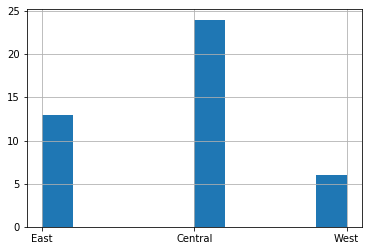

In [288]:
import matplotlib.pyplot as plt

df['Region'].hist()